# PCA for chemical composition of Fetal Bovine Serum (FBS)

In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Import data, check shape, table and basic stats

In [4]:
FBS = pd.read_csv('/Users/nikanesiadis/Desktop/CHE_DS_course/My_Course/My_Notes/Lecture_4_Unsupervised_I/Code_examples/FBS_composition.csv')

In [5]:
FBS.shape

(25, 22)

In [6]:
FBS

,Lot_No,Mfg_Date,Year,Origin,Total_protein,Albumin,Globulin,Bilirubin,ALT,AST,...,Creatinine,Sodium,Potassium,Calcium,Phosphorus,Osmolality,Hemoglobin,pH,IgG,Endotoxin
0,20130527FS,05/2013,2013,Mexico,33,7.0,26.0,0.3,10,73,...,2.5,126,10.3,12.3,8.7,284,10.00,7.68,260.0,6.42
1,20131007FS,10/2013,2013,Mexico,37,8.0,2.9,0.5,11,87,...,2.6,134,10.6,13.1,9.6,295,18.50,7.50,267.0,3.00
2,20140225FS,02/2014,2014,Mexico,36,8.0,2.8,0.4,8,71,...,2.5,133,10.3,13.7,9.1,300,14.30,7.77,171.0,10.00
3,20160511FS,05/2016,2016,Nicaragua,38,2.2,1.6,0.4,8,65,...,3.2,137,10.6,13.9,9.1,302,13.60,7.60,69.9,0.50
4,20130723FS,07/2013,2013,USA,37,8.0,2.9,0.4,6,22,...,2.6,139,10.0,14.2,8.9,301,10.10,7.66,153.0,1.20
5,20131021FS,10/2013,2013,USA,36,8.0,2.8,0.3,6,25,...,2.6,127,9.7,12.5,8.9,280,10.40,7.78,147.0,6.00
6,20131124FS,11/2013,2013,USA,38,8.0,3.0,0.4,8,58,...,2.8,137,10.0,13.7,9.4,304,16.80,7.75,91.0,1.00
7,20140106FS,01/2014,2014,USA,36,8.0,2.8,0.5,8,84,...,2.8,126,9.5,13.6,8.9,301,14.20,7.62,178.0,0.90
8,20140319FS,03/2014,2014,USA,33,8.0,2.5,0.4,7,111,...,2.3,137,10.7,13.9,10.0,312,10.20,7.44,144.0,0.30
9,20140603FS,05/2013,2013,USA,34,9.0,2.5,0.3,6,70,...,2.2,135,9.5,13.2,9.6,307,8.30,7.30,83.1,1.00


In [7]:
FBS.describe()

,Year,Total_protein,Albumin,Globulin,Bilirubin,ALT,AST,Glucose,Urea,Creatinine,Sodium,Potassium,Calcium,Phosphorus,Osmolality,Hemoglobin,pH,IgG,Endotoxin
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,24.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2014.920000,36.400000,4.672000,3.072000,0.400000,8.240000,67.120000,99.640000,14.708333,2.612000,134.480000,10.188000,13.460000,9.328000,300.640000,12.698800,7.481600,146.484000,1.684000
std,1.525341,1.755942,3.035419,4.819537,0.111803,2.487971,24.995533,21.490075,1.654484,0.280357,3.959377,0.496085,0.631796,0.600361,8.285932,4.241604,0.205866,104.234058,2.498344
min,2013.000000,33.000000,0.900000,1.300000,0.200000,5.000000,22.000000,53.000000,12.000000,2.100000,126.000000,9.500000,11.700000,7.800000,280.000000,4.600000,7.200000,68.400000,0.080000
25%,2014.000000,35.000000,2.100000,1.600000,0.300000,6.000000,52.000000,89.000000,14.000000,2.500000,133.000000,10.000000,13.200000,8.900000,300.000000,10.000000,7.300000,89.000000,0.300000
50%,2015.000000,37.000000,2.200000,1.800000,0.400000,8.000000,71.000000,99.000000,14.500000,2.600000,135.000000,10.000000,13.600000,9.300000,302.000000,12.400000,7.440000,102.000000,0.800000
75%,2016.000000,37.000000,8.000000,2.800000,0.400000,10.000000,87.000000,108.000000,15.000000,2.800000,137.000000,10.300000,13.900000,9.600000,306.000000,14.300000,7.660000,153.000000,1.000000
max,2017.000000,40.000000,9.000000,26.000000,0.600000,14.000000,111.000000,140.000000,21.000000,3.200000,142.000000,11.600000,14.300000,10.600000,312.000000,23.900000,7.800000,524.000000,10.000000


## Drop unnecessary columns and reset index

In [36]:
FBS_for_PCA = FBS.drop(['Mfg_Date', 'Origin', 'Year'], axis=1)

In [37]:
FBS_for_PCA.set_index('Lot_No', inplace=True)

In [38]:
FBS_for_PCA.fillna(FBS_for_PCA.mean(), inplace=True) # Here we have to fillna 

,Total_protein,Albumin,Globulin,Bilirubin,ALT,AST,Glucose,Urea,Creatinine,Sodium,Potassium,Calcium,Phosphorus,Osmolality,Hemoglobin,pH,IgG,Endotoxin
Lot_No,,,,,,,,,,,,,,,,,,
20130527FS,33,7.0,26.0,0.3,10,73,76,14.000000,2.5,126,10.3,12.3,8.7,284,10.00,7.68,260.0,6.42
20131007FS,37,8.0,2.9,0.5,11,87,94,15.000000,2.6,134,10.6,13.1,9.6,295,18.50,7.50,267.0,3.00
20140225FS,36,8.0,2.8,0.4,8,71,88,15.000000,2.5,133,10.3,13.7,9.1,300,14.30,7.77,171.0,10.00
20160511FS,38,2.2,1.6,0.4,8,65,53,14.708333,3.2,137,10.6,13.9,9.1,302,13.60,7.60,69.9,0.50
20130723FS,37,8.0,2.9,0.4,6,22,136,14.000000,2.6,139,10.0,14.2,8.9,301,10.10,7.66,153.0,1.20
20131021FS,36,8.0,2.8,0.3,6,25,140,14.000000,2.6,127,9.7,12.5,8.9,280,10.40,7.78,147.0,6.00
20131124FS,38,8.0,3.0,0.4,8,58,106,14.000000,2.8,137,10.0,13.7,9.4,304,16.80,7.75,91.0,1.00
20140106FS,36,8.0,2.8,0.5,8,84,96,14.000000,2.8,126,9.5,13.6,8.9,301,14.20,7.62,178.0,0.90
20140319FS,33,8.0,2.5,0.4,7,111,94,13.000000,2.3,137,10.7,13.9,10.0,312,10.20,7.44,144.0,0.30


## Standardize data

In [39]:
FBS_scaled = StandardScaler().fit_transform(FBS_for_PCA)

## Perform PCA

In [40]:
pca = PCA(n_components=2, svd_solver='full')

In [41]:
PC = pca.fit_transform(FBS_scaled)

### Extract the scores (25 samples (rows), 2 scores (columns))

In [42]:
scores_pd = pd.DataFrame(data = PC
                         ,columns = ['PC1', 'PC2']
                         ,index = FBS_for_PCA.index)

In [43]:
scores_pd

,PC1,PC2
Lot_No,,
20130527FS,4.312939,-3.313669
20131007FS,1.675996,1.445652
20140225FS,1.419774,-0.740885
20160511FS,-1.616654,1.701456
20130723FS,-0.400979,-0.812261
20131021FS,2.916799,-3.009198
20131124FS,-0.044913,0.615308
20140106FS,1.570985,-0.111771
20140319FS,-0.946315,-0.715479


### Extract the loadings (new dimension directions, compared to the old 28) 

In [44]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2']
                           ,index = FBS_for_PCA.columns)

In [45]:
loadings_pd

,PC1,PC2
Total_protein,-0.040289,0.415457
Albumin,0.126443,-0.230927
Globulin,0.175637,-0.235423
Bilirubin,0.156934,0.436270
ALT,0.223644,0.370527
AST,0.130078,0.218658
Glucose,0.141951,-0.059132
Urea,-0.232962,0.093673
Creatinine,-0.198834,0.198329
Sodium,-0.293058,0.179750


## Plot the scores and loadings

In [53]:
def myplot(score,coeff,loading_labels=None,score_labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    xf = xs * scalex
    yf = ys * scaley
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xf, yf)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*1.4, coeff[i,1]*1.4,color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.5, coeff[i,1] * 1.5, loading_labels[i], color = 'r', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1), fontsize=20);
plt.ylabel("PC{}".format(2), fontsize=20);
plt.tick_params(labelsize=16)
plt.grid()



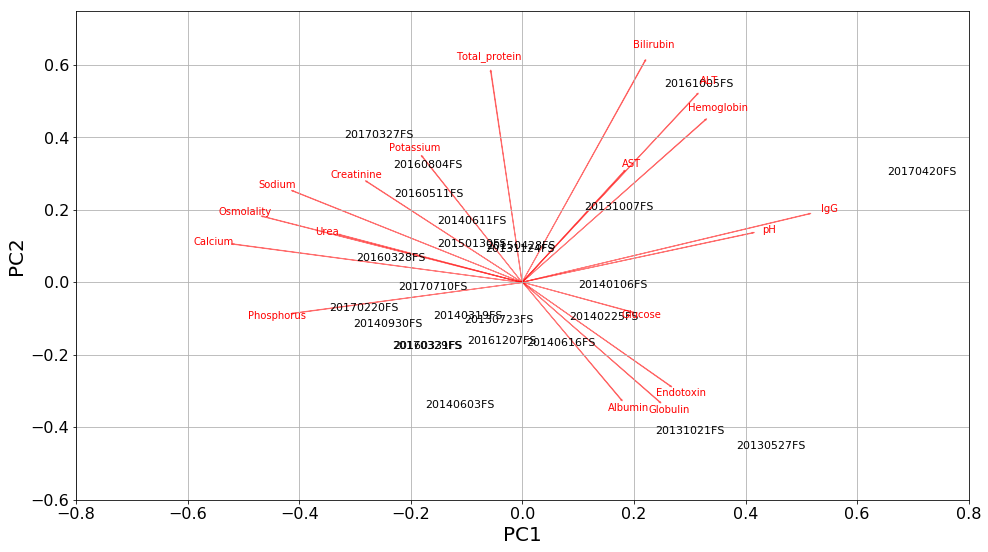

In [54]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()

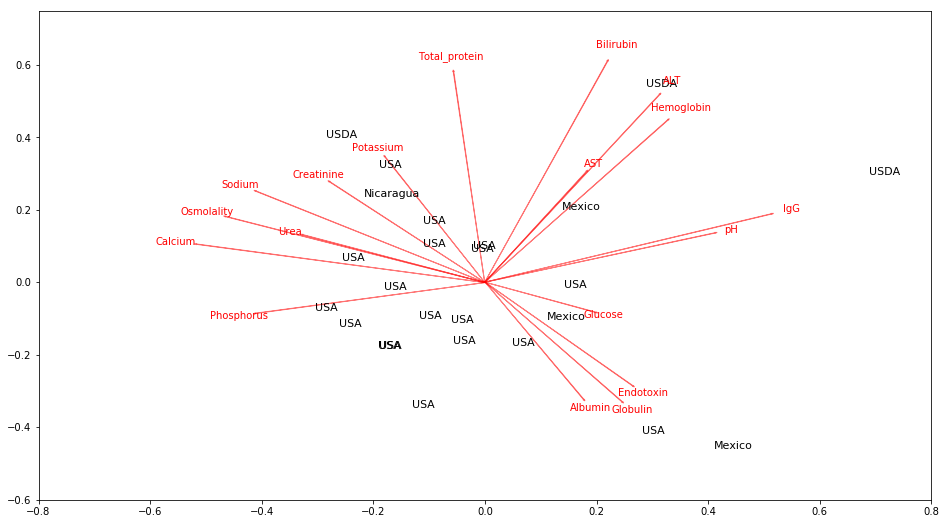

In [55]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=FBS.Origin)
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()

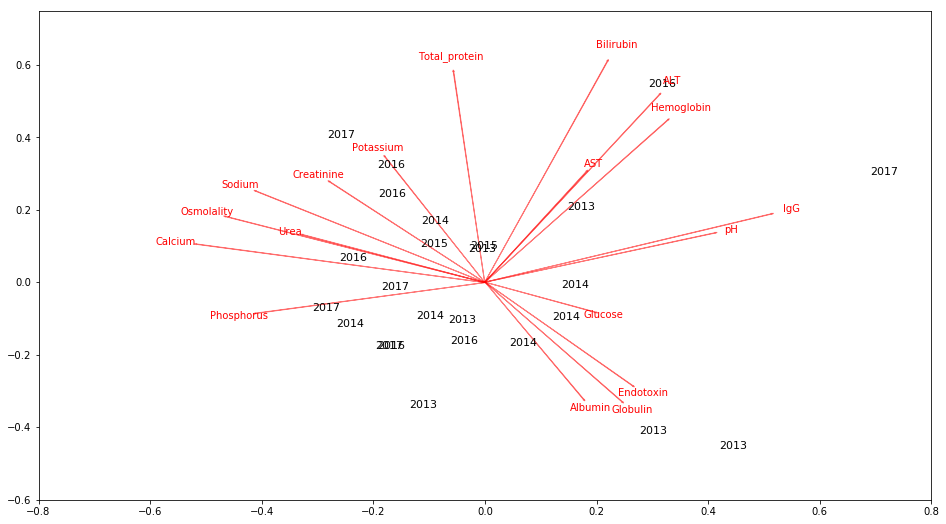

In [56]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=FBS.Year)
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()

## PCA of USA origin serum

In [57]:
FBS_from_USA = FBS.loc[FBS['Origin'] == 'USA']

In [58]:
FBS_USA_for_PCA = FBS_from_USA.drop(['Mfg_Date', 'Origin', 'Year'], axis=1)

In [59]:
FBS_USA_for_PCA.set_index('Lot_No', inplace=True)

In [60]:
FBS_USA_scaled = StandardScaler().fit_transform(FBS_USA_for_PCA)

In [61]:
PC_USA = pca.fit_transform(FBS_USA_scaled)

In [62]:
scores_USA_pd = pd.DataFrame(data = PC_USA
                         ,columns = ['PC1', 'PC2']
                         ,index = FBS_USA_for_PCA.index)

In [63]:
loadings_USA_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2']
                           ,index = FBS_USA_for_PCA.columns)

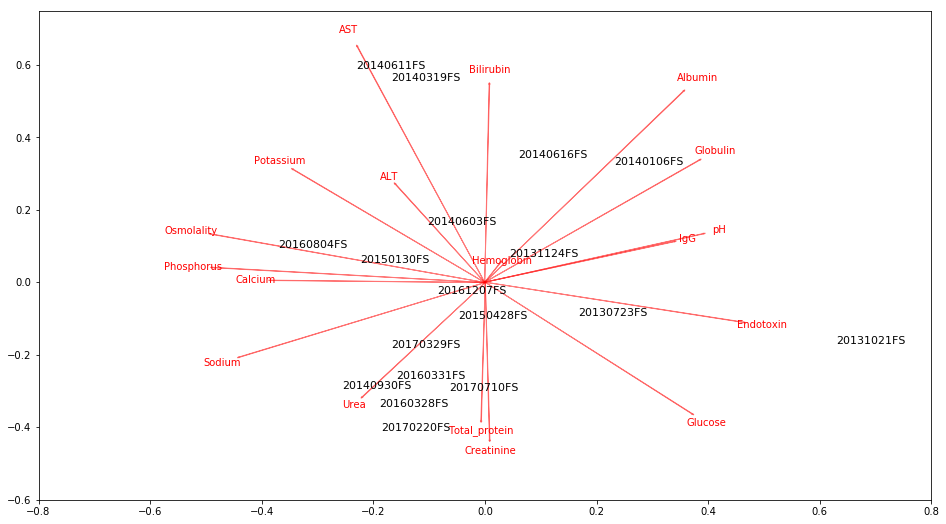

In [65]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC_USA,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_USA_pd.index,score_labels=scores_USA_pd.index)
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()